In [1]:
## Web Scraping ldata from Amazon and analyzing it

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
sns.set_style('darkgrid')

In [3]:
#Function to get the data 

no_page=10

Name=[]
Type=[]
Price=[]
Ratings=[]
Rating_Customers=[]

#Creating a function for time limiting requests between 5 to 10 seconds 
def delay() -> None:
    time.sleep(random.uniform(5, 10))
    return None

def get_data(pageNo):
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    #calling the delay function
    delay()
    body = requests.get('https://www.amazon.com/s?i=computers-intl-ship&bbn=16225007011&rh=n%3A16225007011%2Cn%3A13896617011%2Cn%3A565108&dc&page='+str(pageNo)+'&fst=as%3Aoff&qid=1607680792&rnid=13896617011&ref=sr_pg_'+str(pageNo), headers=headers)#, proxies=proxies)
    content = body.content
    soup=BeautifulSoup(content)
    
    for a in soup.findAll('div',attrs={'class':"sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 sg-col"}):
        name=a.find('span',attrs={'class':"a-size-medium a-color-base a-text-normal"})
        laptoptype=a.find('a', attrs={'class':"a-size-base a-link-normal a-text-bold"})
        price=a.find('span', attrs={'class':"a-offscreen"})
        rate=a.find('span',attrs={'class':"a-icon-alt"})
        peopleno=a.find('span', attrs={'class':"a-size-base"})
        
        #appending the data
        if name is not None:
            Name.append(name.text)
        else:
            Name.append(np.nan)
            
        if laptoptype is not None:
            Type.append(laptoptype.text)
        else:
            Type.append(np.nan)
          
        if price is not None:
            Price.append(price.text)
        else:
            Price.append(np.nan)
        
        if rate is not None:
            Ratings.append(rate.text)
        else:
            Ratings.append(np.nan)
            
        if peopleno is not None:
            Rating_Customers.append(peopleno.text)
        else:
            Rating_Customers.append(np.nan)
        
        
                                       


In [4]:
for i in range(1, no_page+1):
    
    get_data(i)
    
df = pd.DataFrame({'Name':Name,'Type':Type,'Price':Price,'Ratings':Ratings, 'Customers':Rating_Customers})
df.to_csv('Laptops.csv', index=False, encoding='utf-8')

In [5]:
#importing the dataset
data=pd.read_csv('Laptops.csv')

In [6]:
data.head()

,Name,Type,Price,Ratings,Customers
0,"Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...",\n \n \n \n Person...,$454.00,4.6 out of 5 stars,"18,953"
1,"Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...",NaN,NaN,4.6 out of 5 stars,"18,953"
2,"Lenovo IdeaPad 3 14"" Laptop, 14.0"" FHD 1920 x ...",\n \n \n \n Person...,$421.53,4.5 out of 5 stars,"1,550"
3,"Lenovo IdeaPad 3 14"" Laptop, 14.0"" FHD 1920 x ...",NaN,NaN,4.5 out of 5 stars,"1,550"
4,"Acer Predator Helios 300 Gaming Laptop, Intel ...",\n \n \n \n Person...,"$1,178.48",4.7 out of 5 stars,"1,490"


In [7]:
#checking the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       320 non-null    object
 1   Type       160 non-null    object
 2   Price      145 non-null    object
 3   Ratings    320 non-null    object
 4   Customers  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


## Data cleaning

In [8]:
#checking the amount of duplicate rows in the dataset using name column
data['Name'].duplicated().sum()

161

In [9]:
#Removing the duplicates
data.drop_duplicates(subset=['Name'],inplace=True)

In [10]:
data.head()

,Name,Type,Price,Ratings,Customers
0,"Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...",\n \n \n \n Person...,$454.00,4.6 out of 5 stars,"18,953"
2,"Lenovo IdeaPad 3 14"" Laptop, 14.0"" FHD 1920 x ...",\n \n \n \n Person...,$421.53,4.5 out of 5 stars,"1,550"
4,"Acer Predator Helios 300 Gaming Laptop, Intel ...",\n \n \n \n Person...,"$1,178.48",4.7 out of 5 stars,"1,490"
6,"Acer Chromebook Spin 311 Convertible Laptop, I...",\n \n \n \n Person...,$335.99,4.6 out of 5 stars,"2,682"
8,"Acer Nitro 5 Gaming Laptop, 9th Gen Intel Core...",\n \n \n \n Person...,$714.99,4.7 out of 5 stars,"1,576"


In [11]:
#checking if there are any remaining duplicates 
data['Name'].duplicated().sum()

0

In [12]:
#resetting index after removing duplicates
data.reset_index(inplace=True,drop=True)

In [13]:
# Reducing the length of  Names by spliting it and removing the spects of the laptop from Name and being left with just the name
data['Name']=data['Name'].apply(lambda x:x.split(',')[0])

In [14]:
data.head()

,Name,Type,Price,Ratings,Customers
0,Acer Aspire 5 Slim Laptop,\n \n \n \n Person...,$454.00,4.6 out of 5 stars,"18,953"
1,"Lenovo IdeaPad 3 14"" Laptop",\n \n \n \n Person...,$421.53,4.5 out of 5 stars,"1,550"
2,Acer Predator Helios 300 Gaming Laptop,\n \n \n \n Person...,"$1,178.48",4.7 out of 5 stars,"1,490"
3,Acer Chromebook Spin 311 Convertible Laptop,\n \n \n \n Person...,$335.99,4.6 out of 5 stars,"2,682"
4,Acer Nitro 5 Gaming Laptop,\n \n \n \n Person...,$714.99,4.7 out of 5 stars,"1,576"


In [15]:
#Removing spaces in the Computer type column
data['Type']=data['Type'].apply(lambda x:x.split("            ")[1])
data['Type']=data['Type'].apply(lambda x:x.split('\n')[0])

In [16]:
data.head()

,Name,Type,Price,Ratings,Customers
0,Acer Aspire 5 Slim Laptop,Personal Computers,$454.00,4.6 out of 5 stars,"18,953"
1,"Lenovo IdeaPad 3 14"" Laptop",Personal Computers,$421.53,4.5 out of 5 stars,"1,550"
2,Acer Predator Helios 300 Gaming Laptop,Personal Computers,"$1,178.48",4.7 out of 5 stars,"1,490"
3,Acer Chromebook Spin 311 Convertible Laptop,Personal Computers,$335.99,4.6 out of 5 stars,"2,682"
4,Acer Nitro 5 Gaming Laptop,Personal Computers,$714.99,4.7 out of 5 stars,"1,576"


In [17]:
#Removing dollar sign $ and ',' in the Price
data['Price']=data['Price'].str.replace('$','')
#removing "," in the prices and changing to float
data['Price']=data['Price'].str.replace(',', '').astype(float)
#rouding off the numbers to a single value so as to take care of the cents
data['Price']=round(data['Price'])

In [18]:
#Getting the ratings of the laptops and changing to float
data['Ratings']=data['Ratings'].apply(lambda x:x.split(' ')[0]).astype(float)

In [19]:
#Removing ',' from Customers column and changing to intiger
data['Customers']=data['Customers'].apply(lambda x: x.replace(',','')).astype(int)

In [20]:
data.head()

,Name,Type,Price,Ratings,Customers
0,Acer Aspire 5 Slim Laptop,Personal Computers,454.0,4.6,18953
1,"Lenovo IdeaPad 3 14"" Laptop",Personal Computers,422.0,4.5,1550
2,Acer Predator Helios 300 Gaming Laptop,Personal Computers,1178.0,4.7,1490
3,Acer Chromebook Spin 311 Convertible Laptop,Personal Computers,336.0,4.6,2682
4,Acer Nitro 5 Gaming Laptop,Personal Computers,715.0,4.7,1576


In [21]:
#finding missing values
data.isnull().sum()

Name          0
Type          0
Price        15
Ratings       0
Customers     0
dtype: int64

In [22]:
data['Price'].notnull().mean()

0.9056603773584906

In [23]:
#Filling missing data with the average prices
data['Price'].fillna(value=data['Price'].mean(),inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       159 non-null    object 
 1   Type       159 non-null    object 
 2   Price      159 non-null    float64
 3   Ratings    159 non-null    float64
 4   Customers  159 non-null    int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 5.7+ KB


## Exploring the data

In [25]:
#checking the type of laptops in the dataset
data['Type'].value_counts()

Personal Computers                             142
Platinum                                         3
Brilliant Black                                  2
Red                                              1
sliver                                           1
Mineral Silver                                   1
Misc.                                            1
White                                            1
FHD, 256GB, 8GB RAM, i5-10210U, WIN 10 HOME      1
Natural silver                                   1
Snow White                                       1
Indie Black                                      1
Transparent Silver                               1
Diamond White                                    1
Moonlight White                                  1
Name: Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

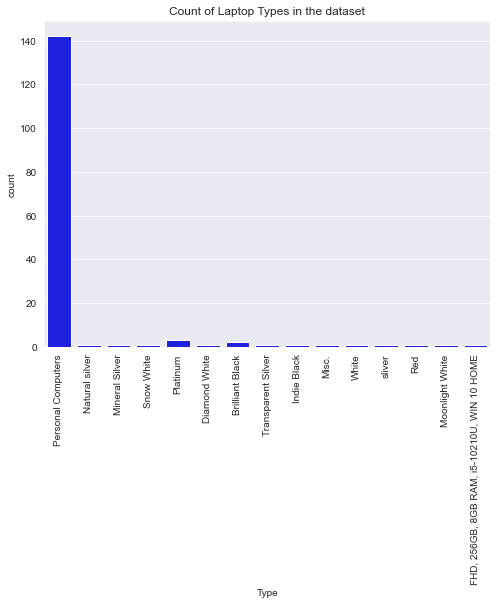

In [26]:
#Ploting the counts
plt.figure(figsize=[8,6])
sns.countplot(data['Type'],color='blue')
plt.title('Count of Laptop Types in the dataset')
plt.xticks(rotation=90)

In [27]:
#Top 10 laptops with high prices
top10=data.sort_values(by='Price',ascending=False)[0:10]

In [28]:
top10

,Name,Type,Price,Ratings,Customers
153,Razer Blade Pro 17 Gaming Laptop 2020: Intel C...,Personal Computers,3000.0,3.9,82
72,Razer Blade 15 Advanced Gaming Laptop 2020: In...,Personal Computers,2800.0,4.4,186
71,New Alienware m15 15.6 inch FHD Gaming Laptop ...,Personal Computers,2399.0,4.3,42
158,ASUS ROG Strix Scar 17 Gaming Laptop,Personal Computers,2135.0,4.2,45
50,Dell XPS 15 - 15 Inch FHD+,Personal Computers,2100.0,4.0,149
54,ASUS ZenBook Pro Duo UX581 15.6” 4K UHD NanoEd...,Personal Computers,2000.0,4.3,423
147,ASUS ROG Strix Scar 15 (2020) Gaming Laptop,Personal Computers,1999.0,4.3,119
138,New Alienware m17 R3 17.3 inch FHD Gaming Lapt...,Personal Computers,1940.0,4.4,72
75,ASUS ROG GU502GW-AH76 Zephyrus M Thin and Port...,Personal Computers,1900.0,4.2,359
60,"MSI Creator 15 A10SFS-287 15.6"" UHD 4K Ultra T...",Personal Computers,1880.0,3.9,8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

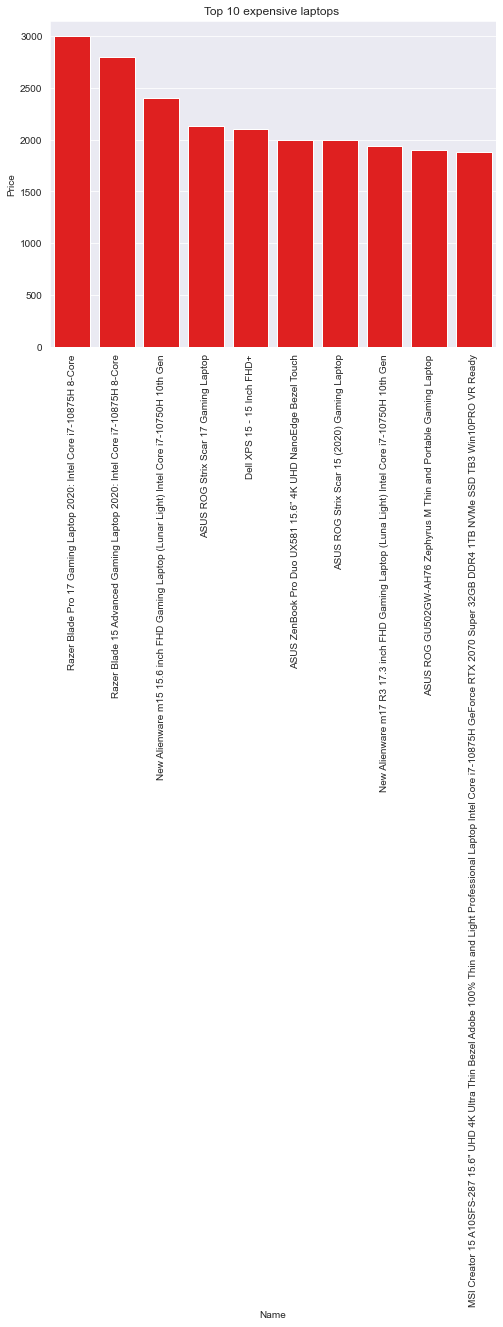

In [29]:
plt.figure(figsize=[8,6])
sns.barplot(x='Name',y='Price',data=top10,color='red')
plt.title("Top 10 expensive laptops ")
plt.xticks(rotation=90)


In [30]:
rate10=data[data['Customers']>1000]
rate10=rate10.sort_values(by='Customers',ascending=False)[:10]
rate10

,Name,Type,Price,Ratings,Customers
0,Acer Aspire 5 Slim Laptop,Personal Computers,454.0,4.6,18953
10,Lenovo Chromebook C330 2-in-1 Convertible Laptop,Personal Computers,296.0,4.5,5553
120,Acer Flagship CB3-532 15.6inch HD Premium Chro...,Personal Computers,249.0,4.3,4932
22,ASUS Laptop L210 Ultra Thin Laptop,Personal Computers,230.0,4.3,4660
15,ASUS F512JA-AS34 VivoBook 15 Thin and Light La...,Personal Computers,488.0,4.5,3463
9,"Lenovo Flex 5 14"" 2-in-1 Laptop",Personal Computers,770.0,4.5,2718
3,Acer Chromebook Spin 311 Convertible Laptop,Personal Computers,336.0,4.6,2682
38,Newest HP Stream 14inch HD(1366x768) Display,Personal Computers,289.0,4.2,2463
103,"SAMSUNG 11.6"" Chromebook with Intel N3060 up t...",Personal Computers,274.0,4.5,2384
132,Dell Chromebook 3120 Intel celeron n2840 2.16Hgz,Personal Computers,180.0,4.2,2183


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

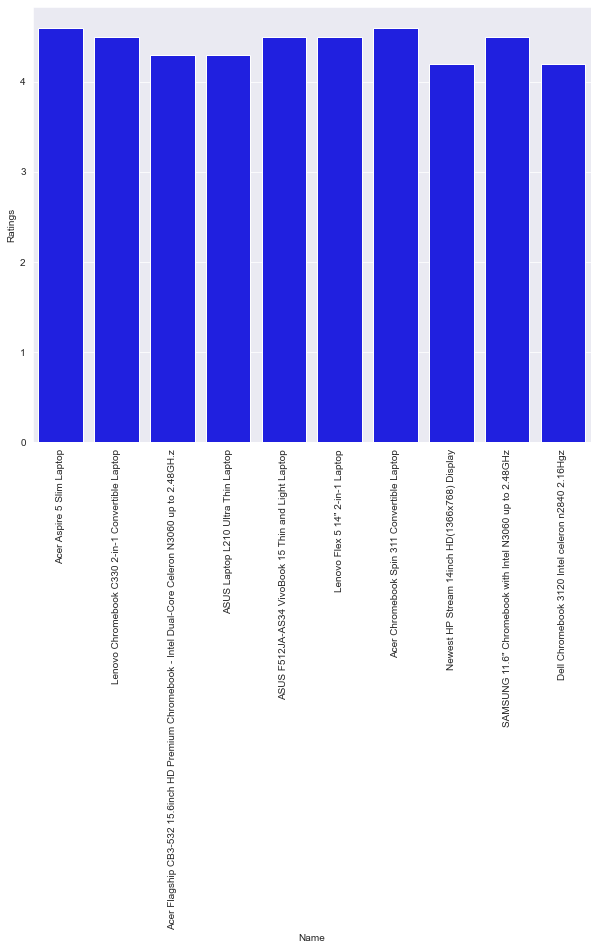

In [31]:
#top 10  rated books
plt.figure(figsize=(10,8))
sns.barplot(x='Name',y='Ratings',data=rate10,color='blue')
plt.xticks(rotation=90)

In [32]:
#The top 10 laptops with the heighest number of customer ratings
rate = data.sort_values(["Customers"], axis=0, ascending=False)[:10]

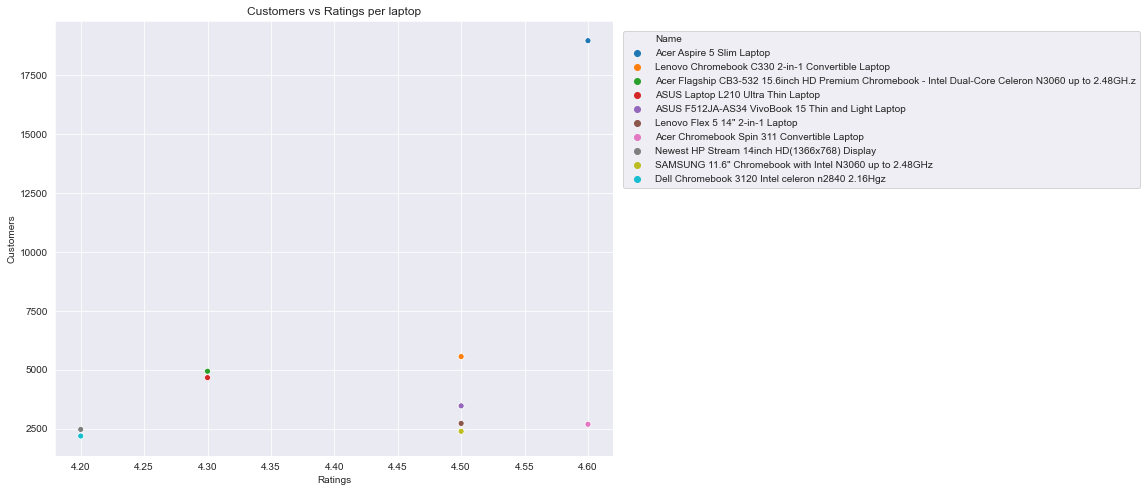

In [34]:
#Visualization 
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ratings',y='Customers',data=rate,hue='Name')
plt.title('Customers vs Ratings per laptop')
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=1)